In [1]:
%cd /content/drive/MyDrive/Colab Notebooks/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression

/content/drive/MyDrive/Colab Notebooks/Business Analyst course/Statistics and Descriptive Analytics/Multilinear Regression


#Libraries, directory, and data import

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [7]:
#Load the data file
df = pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


#Analyzing the data

In [9]:
#Summary statistics
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [10]:
df['yrs.service'].std()

13.006023785473097

In [11]:
df_copy = df

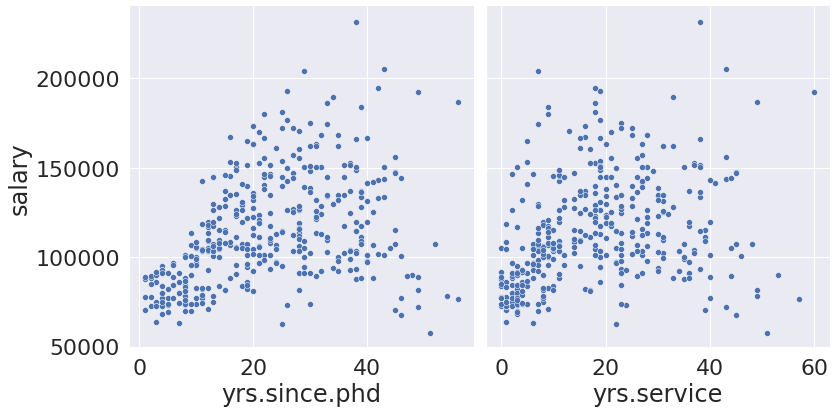

In [16]:
#Plotting continuous independent variables against the dependent variable
sns.set(font_scale = 2)
sns.pairplot(data = df,
             y_vars = ['salary'],
             x_vars = ['yrs.since.phd', 'yrs.service'],
             height = 6)


In [18]:
df_corr = df.corr()

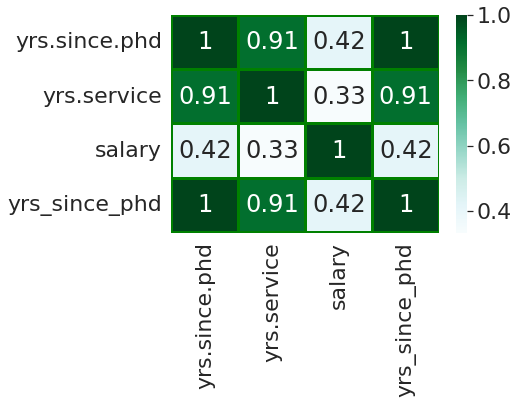

In [20]:
sns.heatmap(df_corr,
            annot = True,
            fmt = '.2g',
            cmap = 'BuGn',
            linewidths = 2,
            linecolor = 'Green')

#Categorical variables

In [24]:
df['rank'].value_counts()
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

#For loop

In [27]:
#Loop over categorical variables
categorical = list(df.select_dtypes(include = 'object'))
categorical
for cat in categorical:
  print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


#Create dummy variables

In [28]:
#Review data
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,yrs_since_phd
0,Prof,B,19,18,Male,139750,19
1,Prof,B,20,16,Male,173200,20
2,AsstProf,B,4,3,Male,79750,4
3,Prof,B,45,39,Male,115000,45
4,Prof,B,40,41,Male,141500,40


In [29]:
#Transform non-numerical data into dummy variables
df = pd.get_dummies(data = df,
                    drop_first = True)
df.head()

,yrs.since.phd,yrs.service,salary,yrs_since_phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,19,0,1,1,1
1,20,16,173200,20,0,1,1,1
2,4,3,79750,4,1,0,1,1
3,45,39,115000,45,0,1,1,1
4,40,41,141500,40,0,1,1,1


#Multilinear regression preparation

In [40]:
#Isolate X and y
X = df.drop(columns = ['salary', 'yrs.service', 'yrs_since_phd', 'yrs.since.phd'])
y = df.salary / 1000
X.head(1)

,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,0,1,1,1


In [41]:
#Add constant
X = sm.add_constant(X)
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,0,1,1,1
1,1.0,0,1,1,1
2,1.0,1,0,1,1
3,1.0,0,1,1,1
4,1.0,0,1,1,1


In [42]:
#Underfitting and overfitting
#Underfitting doesn't provide any useful correlation
#Overfitting tells too much about individual data points and doesn't correlate well

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [44]:
clf = sm.OLS(endog = y_train, exog = X_train).fit()

In [45]:
print(clf.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     73.60
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           7.26e-44
Time:                        18:50:25   Log-Likelihood:                -1431.4
No. Observations:                 317   AIC:                             2873.
Df Residuals:                     312   BIC:                             2892.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            80.7273      5.136     15.718

In [49]:
from sklearn.ensemble import RandomForestRegressor
clf2 = RandomForestRegressor()
clf2.fit(X_train, y_train)

RandomForestRegressor()

#MAE and RMSE:

In [50]:
#Mean absolute error is more interpretable when sharing with stakeholders;
#Root mean squared error is more useful when dealing with models that have more
  #extreme values/outliers

#Accuracy scoring

In [54]:
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
print('MSE: ', round(mean_absolute_error(y_test, y_pred), 1))

MSE:  16.6


In [56]:
print('RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_pred)), 1))

RMSE:  24.1


#Exercise

In [57]:
##Exercise: store sales drivers
#Pick variables for your model
#Analyze the data - summary statistics
#Build a correlation matrix - heatmap
#Create a train test split
#Build the model
#Assess accuracy